In [45]:
import pandas as pd

df = pd.read_csv("car data.csv")  # asegúrate de usar el nombre exacto del archivo
print(df.head())



  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [25]:
print(df.isnull().sum())
print(f"Duplicados: {df.duplicated().sum()}")


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Duplicados: 2


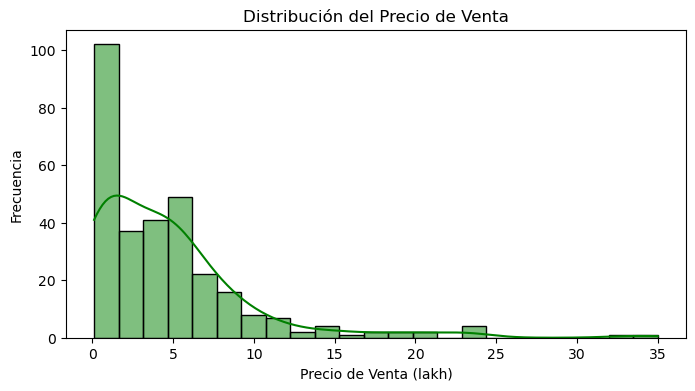

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Selling_Price'], kde=True, color='green')
plt.title("Distribución del Precio de Venta")
plt.xlabel("Precio de Venta (lakh)")
plt.ylabel("Frecuencia")
plt.show()


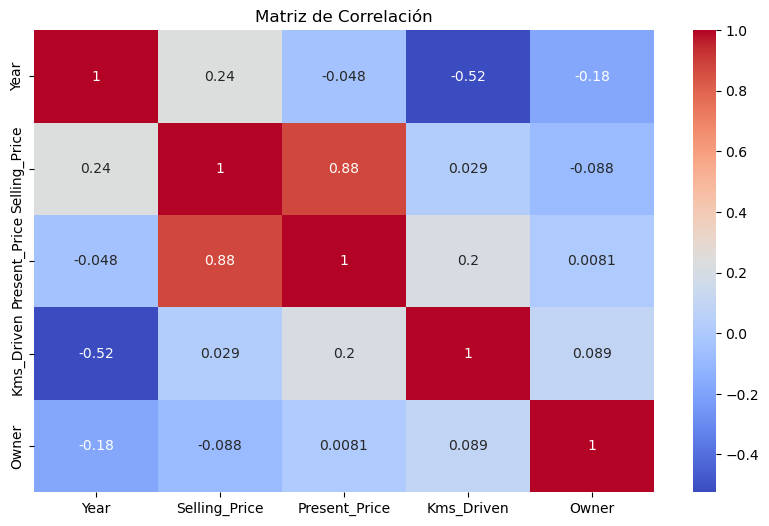

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar columnas numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Graficar matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()



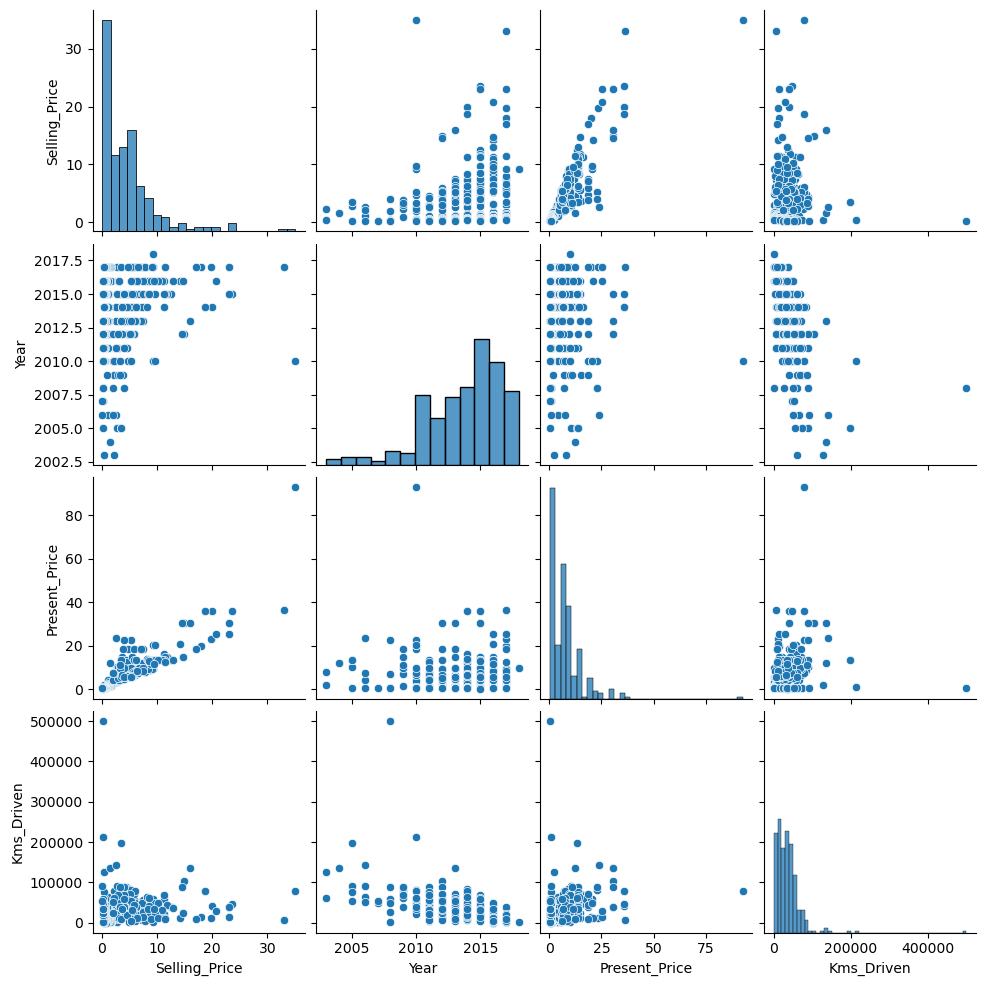

In [31]:
sns.pairplot(df[['Selling_Price', 'Year', 'Present_Price', 'Kms_Driven']])
plt.show()


In [32]:
# Revisar de nuevo valores nulos por seguridad
print(df.isnull().sum())

# Si hay pocos valores nulos, se pueden eliminar
df.dropna(inplace=True)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [33]:
df = pd.get_dummies(df, drop_first=True)


In [34]:
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['Present_Price', 'Kms_Driven', 'Car_Age']

df[num_features] = scaler.fit_transform(df[num_features])


In [36]:
print(df.head())
print(df.columns)


   Selling_Price  Present_Price  Kms_Driven  Owner  Car_Name_Activa 3g  \
0           3.35      -0.236215   -0.256224      0               False   
1           4.75       0.221505    0.155911      0               False   
2           7.25       0.257427   -0.773969      0               False   
3           2.85      -0.403079   -0.817758      0               False   
4           4.60      -0.087890    0.141743      0               False   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False   

   Car_Name_Bajaj Avenger 150 street  Car_Name_Bajaj Avenger 220  ...  \
0                  

In [37]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las 5 mejores características (puedes ajustar este número)
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Ver cuáles fueron seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features.tolist())


Características seleccionadas: ['Present_Price', 'Car_Name_fortuner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual']


In [39]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

importance = np.abs(lasso.coef_)
feature_importance = pd.Series(importance, index=X.columns)
print(feature_importance.sort_values(ascending=False))


Present_Price                 3.602835
Car_Name_innova               3.375617
Car_Name_fortuner             2.877943
Car_Name_creta                2.216875
Car_Name_land cruiser         1.299414
                                ...   
Car_Name_Honda CBR 150        0.000000
Car_Name_Honda CB twister     0.000000
Car_Name_Honda CB Unicorn     0.000000
Car_Name_Honda CB Trigger     0.000000
Car_Name_Suzuki Access 125    0.000000
Length: 105, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split

# Usamos solo las características seleccionadas
X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [42]:
y_pred = model.predict(X_test)


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1.57
MSE: 6.23
RMSE: 2.50
R² Score: 0.73


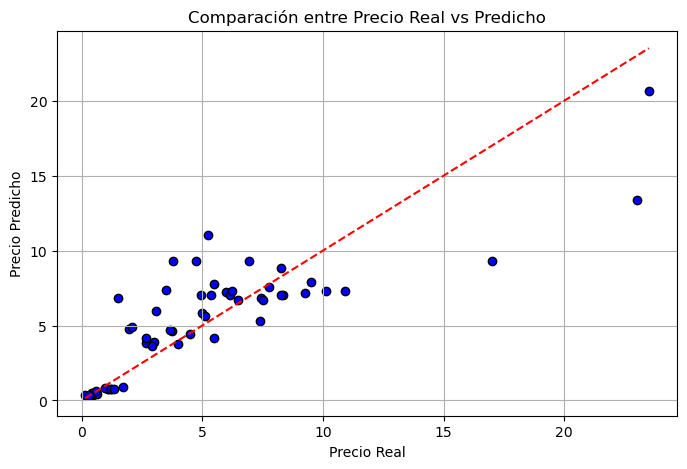

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real vs Predicho")
plt.grid(True)
plt.show()
